In [1]:
# import libraries
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Reading of Dataset song_data.csv
df=pd.read_csv("song_data.csv")
df['title']=df['title'].str.upper()

In [3]:
df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,SILENT NIGHT,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,TANSSI VAAN,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,NO ONE COULD EVER,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,SI VOS QUERÉS,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,TANGLE OF ASPENS,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
# Reading of Dataset 10000.txt
df1=pd.read_csv("10000.txt",sep="\t",names=["user_id", "song_id","count"])

In [5]:
df1.head()

,user_id,song_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [6]:
# Merge Two datasets to create one
dataset = pd.merge(df,df1,how="inner",on='song_id')
dataset.shape

(2086946, 7)

In [7]:
# Drop Duplicates
dataset  = dataset.drop_duplicates().reset_index()

In [8]:
# Taking only those enteries whose year of release is greater than 1900
dataset = dataset[dataset['year']>=1900]
dataset.shape

(1677154, 8)

In [9]:
dataset.head()

,index,song_id,title,release,artist_name,year,user_id,count
0,0,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6
1,1,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1
2,2,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4
3,3,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1
4,4,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1


In [10]:
# Creating the dataset in which we count the Number of Users Listened The particular Song
Song_Listen_Count = dataset.groupby(by = ['song_id'])['count'].count().reset_index().rename(columns ={'count':'Song_Listen_Count'})[['song_id','Song_Listen_Count']]
Song_Listen_Count.head()

,song_id,Song_Listen_Count
0,SOAAAGQ12A8C1420C8,66
1,SOAACSG12AB018DC80,67
2,SOAAFAC12A67ADF7EB,190
3,SOAAFYH12A8C13717A,130
4,SOAAJMQ12A6D4F7D17,88


In [11]:
# Creating the dataset in which we count the Number of Song Heard By a particular User
NumberofSongHeardByUser = dataset.groupby(by = ['user_id'])['count'].count().reset_index().rename(columns ={'count':'Number_of_Song_Listened_By_User'})[['user_id','Number_of_Song_Listened_By_User']]
NumberofSongHeardByUser.head()

,user_id,Number_of_Song_Listened_By_User
0,00003a4459f33b92906be11abe0e93efc423c0ff,4
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,4
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,7
3,0007235c769e610e3d339a17818a5708e41008d9,8
4,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,8


In [12]:
# merge the dataset with the Song_Listen_Count dataset
dataset = dataset.merge(Song_Listen_Count , left_on='song_id' , right_on='song_id',how = 'left')
dataset.head()

,index,song_id,title,release,artist_name,year,user_id,count,Song_Listen_Count
0,0,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6,118
1,1,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1,118
2,2,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4,118
3,3,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1,118
4,4,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1,118


In [13]:
# merge the dataset with the NumberofSongHeardByUser dataset
dataset = dataset.merge(NumberofSongHeardByUser , left_on='user_id' , right_on='user_id',how = 'left')
dataset.head()

,index,song_id,title,release,artist_name,year,user_id,count,Song_Listen_Count,Number_of_Song_Listened_By_User
0,0,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,d6589314c0a9bcbca4fee0c93b14bc402363afea,6,118,42
1,1,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,484b69dd013df1ec0cfd504886d4f647cb32b08f,1,118,46
2,2,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,3f9ed694a79835c921ef6d94acd28f876c1d901e,4,118,43
3,3,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,b882a5b0dbd1a80533e40745be976f19d1fad5b0,1,118,46
4,4,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,2bcef2a30bd8913405971761a0e6c292d771c086,1,118,11


In [14]:
# selecting only those users and songs whose Song_Listen_Count >= 100 and Number_of_Song_Listened_By_User>=50
dataset = dataset[(dataset['Song_Listen_Count']>=100) & (dataset['Number_of_Song_Listened_By_User']>=50)]

In [15]:
dataset.head()

,index,song_id,title,release,artist_name,year,user_id,count,Song_Listen_Count,Number_of_Song_Listened_By_User
7,7,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,535ed77c299c240a81a82bc3edaae35e062c52fa,1,118,226
9,9,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,e0dc9c4ddf5dfd341ab21610ca4563e88e901988,1,118,90
12,12,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,a9af7c6186ea3053a00bbc76c886f94bc5ff524e,7,118,97
18,18,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,7f87e388cf9aa847e79356636874c16a5537d520,3,118,50
19,19,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,9dc4a128934f3bd9353ef75b9efc260b23502415,3,118,110


In [16]:
dataset.shape

(562826, 10)

In [17]:
dataset['Rating'] = dataset['count']

In [18]:
# Function to convert the Listen Count into rating
def listen_count_to_rating(listen_count):
    if listen_count == 1:
        return 1
    elif listen_count == 2:
        return 2
    elif listen_count == 3:
        return 3
    elif listen_count == 4:
        return 4
    elif listen_count >4 and listen_count<=7:
        return 5
    elif listen_count >7 and listen_count<=10:
        return 6
    elif listen_count >10 and listen_count<=14:
        return 7
    elif listen_count >14 and listen_count<=19:
        return 8
    elif listen_count >19 and listen_count<=45:
        return 9
    elif listen_count >60:
        return 10
    
dataset['Rating'] = dataset['Rating'].apply(listen_count_to_rating)

In [19]:
dataset.head()

,index,song_id,title,release,artist_name,year,user_id,count,Song_Listen_Count,Number_of_Song_Listened_By_User,Rating
7,7,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,535ed77c299c240a81a82bc3edaae35e062c52fa,1,118,226,1.0
9,9,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,e0dc9c4ddf5dfd341ab21610ca4563e88e901988,1,118,90,1.0
12,12,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,a9af7c6186ea3053a00bbc76c886f94bc5ff524e,7,118,97,5.0
18,18,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,7f87e388cf9aa847e79356636874c16a5537d520,3,118,50,3.0
19,19,SOSZNRJ12A8AE46E38,ANYONE ELSE BUT YOU,Juno - Music From The Motion Picture,Michael Cera & Ellen Page,2007,9dc4a128934f3bd9353ef75b9efc260b23502415,3,118,110,3.0


In [20]:
# Total Number of Unique Songs
print(len(dataset['song_id'].unique()))

5483


In [21]:
# Total Number of Unique Users
print(len(dataset['user_id'].unique()))

7590


In [22]:
# Splitting the dataset in testing and training set
dataset=dataset.sample(frac=1).reset_index(drop=True)
test_data=dataset.iloc[:10]
train_data=dataset.iloc[10:]

In [23]:
# make pivot table
pivot = dataset.pivot_table(index=['user_id'],columns=['song_id'],values='Rating').fillna(0)

In [24]:
pivot.shape

(7590, 5483)

In [25]:
pivot.head()

song_id,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAATLI12A8C13E319,SOAAVUV12AB0186646,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,SOABJTC12A58A7DE0E,SOABNPW12A6D4FC9B5,SOABRAB12A6D4F7AAF,SOABTTR12A6D4FC2EB,...,SOZYNNT12A81C22E0F,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZYUXF12A6701F7B9,SOZZHQT12AB018B714,SOZZIOH12A67ADE300,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F
user_id,,,,,,,,,,,,,,,,,,,,,
000ebc858861aca26bac9b49f650ed424cf882fc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00185e316f07f0f00c325ca034be59c15b362401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002543003041db1d049206b09426d5cdffc0f451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028292aa536122c1f86fd48a39bd83fe582d27f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0031572620fa7f18487d3ea22935eb28410ecc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# method to find the recommendations. 
def user_user (data,user_id,n_recom):
    nearest = nearestNeighbor(data , user_id)
    user_user_songs=[]
    user_data= pd.DataFrame(data.loc[user_id]).reset_index()
    user_data.replace(0, np.nan, inplace=True)

    for user in nearest:
        if(len(user_user_songs)>n_recom):
            break
        songs = []
        similar_data= pd.DataFrame(data.loc[user[0]]).reset_index()
        similar_data.replace(0, np.nan, inplace=True)

        for idx in similar_data.index:
            if ~np.isnan(similar_data.iloc[idx][1]) and np.isnan(user_data.iloc[idx][1]):
                songs.append((similar_data.iloc[idx][0],float(similar_data.iloc[idx][1]*0.3+0.7*user[1])))
         
        songs=sorted(songs,key= lambda x: x[1],reverse=True)
        for s in songs :
            user_user_songs.append(s)
            
    actual_recom = []
    for song in user_user_songs:
        actual_recom.append((song[0] , data[song[0]].sum()/(data[song[0]]!=0).sum()))
        
    user_user_songs = sorted(user_user_songs , key= lambda x: x[1],reverse = True)    
    user_user_songs = np.array(user_user_songs[:n_recom])
    actual_recom = sorted(actual_recom , key = lambda x:x[1] , reverse = True)
    actual_recom = np.array(actual_recom[:n_recom])
    user_data=pd.DataFrame()
    for song in user_user_songs[: ,0] :
        user_data=pd.DataFrame(user_data.append(dataset[dataset['song_id']==song],ignore_index=True))

    user_data=user_data[['song_id','title']].drop_duplicates(subset=['song_id'],keep='first').reset_index(drop=True)
    user_data.insert(2,'score',user_user_songs[: ,1])
    
    print("Recommendation to the user {}".format(user_id))
    plotGraph(user_data)
    print("RMSE for {} recommendation :- {}".format(n_recom, rmse(np.array(actual_recom[:,1],dtype=float),\
                                                                  np.array(user_user_songs[:,1],dtype = float))))
    print("MSE for {} recommendation :- {}".format(n_recom , mse(np.array(actual_recom[:,1],dtype=float),\
                                                                 np.array(user_user_songs[:,1],dtype = float))))
    
    return (recommender_precision(user_user_songs[:,0],actual_recom[:,0]),\
            recommender_recall(user_user_songs[:,0],actual_recom[:,0]),\
            rmse(np.array(actual_recom[:,1],dtype=float),np.array(user_user_songs[:,1],dtype = float)),\
            mse(np.array(actual_recom[:,1],dtype=float),np.array(user_user_songs[:,1],dtype = float)),\
            mark(user_user_songs[:,0],actual_recom[:,0]),actual_recom[:,0],user_user_songs[:,0])

# Nearest Neighbor Method to calculate the nearest neighbour. It uses pearson similarity as distance metric
def nearestNeighbor(data,user):
    pearson_sim = []
    for user_id in data.index:
        if user_id==user:
            continue
        similarity = pearsonr(data.loc[str(user)], data.loc[str(user_id)])
        pearson_sim.append((user_id,similarity[0]))
        
    pearson_sim = sorted(pearson_sim, key=lambda x: x[1], reverse=True)
    
    nearest_neighbors = pearson_sim 
    return nearest_neighbors

def recommender_precision(predicted, actual):
    """
    Computes the precision of each user's list of recommendations, and averages precision over all users.
    """
    def calc_precision(predicted, actual):
        prec = [value for value in predicted if value in actual]
        prec = np.round(float(len(prec)) / float(len(predicted)), 4)
        return prec

    precision = np.mean(list(map(calc_precision, predicted, actual)))
    return precision

def recommender_recall(predicted, actual):
    """
    Computes the recall of each user's list of recommendations, and averages precision over all users.
    """
    def calc_recall(predicted, actual):
        reca = [value for value in predicted if value in actual]
        reca = np.round(float(len(reca)) / float(len(actual)), 4)
        return reca

    recall = np.mean(list(map(calc_recall, predicted, actual)))
    return recall

def rmse(y, yhat):
    """
    Computes the root mean square error (RMSE)
    """
    rmse = sqrt(mean_squared_error(y, yhat))
    return rmse

def mse(y, yhat):
    """
    Computes the mean square error (MSE)
    """
    mse = mean_squared_error(y, yhat)
    return mse


def _ark(actual, predicted, k=10):
    """
    Computes the average recall at k.
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / len(actual)

# method to train the model
def train(data , test_data , n_recom=10):
    mean_avg_precision = []
    mean_avg_recall = []
    rmse = []
    mse = []
    mar_k = []
    actual = []
    preds = []


    for i in range(len(test_data)):
        metrics = user_user(data,test_data.iloc[i][6],10)
        mean_avg_precision.append(metrics[0])
        mean_avg_recall.append(metrics[1])
        rmse.append(metrics[2])
        mse.append(metrics[3])
        mar_k.append(metrics[4])
        actual.append(metrics[5].tolist())
        preds.append(metrics[6].tolist())
    

    ans = list()
    actual = list(actual)
    preds = list(preds)

    for i in range(1,11):
        met = []
        for act , pre in zip(actual,preds):
            met.append(mark(act,pre,k=i))
            
        ans.append(np.mean(met))

    print(ans)

    plot_mark(ans,10)   
    print("Mean Average Precision :- {}".format(np.mean(mean_avg_precision)))
    print("Mean Average Recall :- {}".format(np.mean(mean_avg_recall)))
    print("Root Mean Square Error :- {}".format(np.mean(rmse)))
    print("Mean Square Error :- {}".format(np.mean(mse)))
    return mean_avg_precision,mean_avg_recall,rmse,mse,mark

def mark(actual, predicted, k=10):
    """
    Computes the mean average recall at k.
    """
    val=float(np.mean([_ark(a,p,k) for a,p in zip(actual, predicted)]))
    return val
 
# Method to plot the recommendations
def plotGraph(data,name='USER-USER'):
    data_plot=data
    plt.figure(figsize=(5,5))
    m=float(data_plot['score'].max())
    axis1=sns.barplot(x=data_plot.iloc[:,2].head(10).astype('float64'), y=data_plot.iloc[:,1].head(10), data=data_plot)
    scaling=np.linspace(0,m,10)
    plt.xticks(scaling)
    
    plt.title('Best Songs by {}'.format(name), weight='bold')
    plt.xlabel('{}'.format(name), weight='bold')
    plt.ylabel('Song Title', weight='bold')
    plt.show()
    
# method to plot the MAR@K curve
def plot_mark(mark_values,k):
    ax = plt.plot(mark_values , color="green",label="MAR@K")
    plt.xticks(np.arange(k))
    plt.title('Mean Average Recall at K (MAR@K) Comparison')
    plt.xlabel('K')
    plt.ylabel('MAR@K')
    plt.show()

Recommendation to the user d99cce8777bc1c18bf543498b23f7fc04f4e5fac


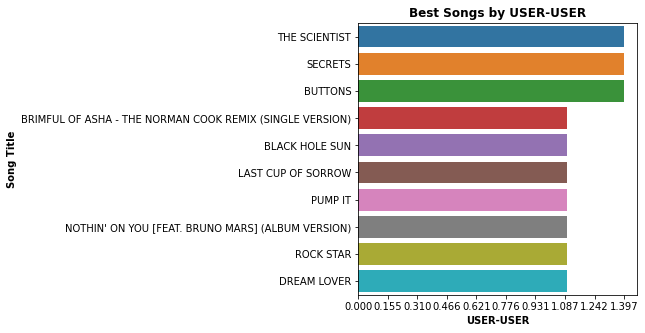

RMSE for 10 recommendation :- 1.596608317483012
MSE for 10 recommendation :- 2.549158119455934
Recommendation to the user 438c18ed9abf664019f228ae3ff4e2e1cf15e89d


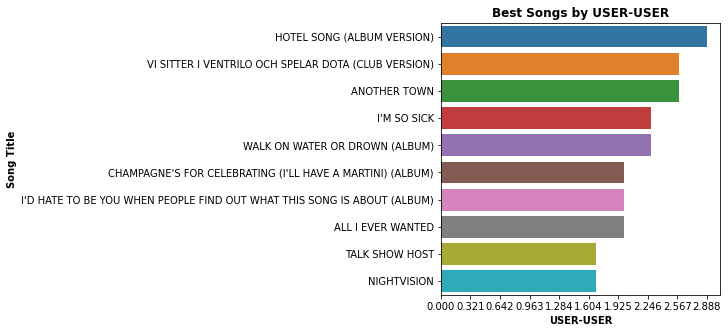

RMSE for 10 recommendation :- 0.7684546129845997
MSE for 10 recommendation :- 0.590522492217311
Recommendation to the user 0a6c1c6c88bbd53d04806d022cf45e5e45cd0c24


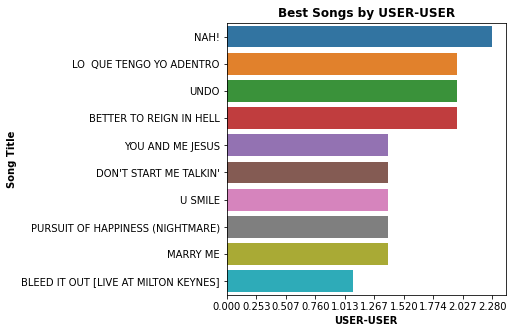

RMSE for 10 recommendation :- 1.2571415203239833
MSE for 10 recommendation :- 1.5804048021224961
Recommendation to the user 26c613f3e497a2294b729b509eb4d189d358fcf5


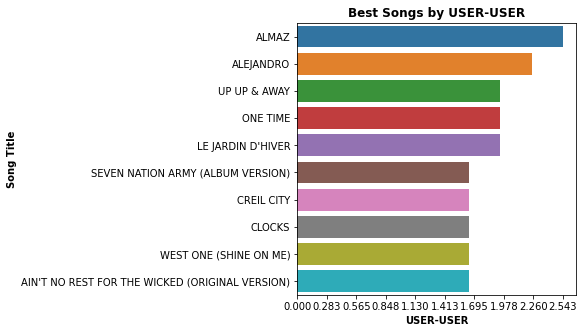

RMSE for 10 recommendation :- 1.422646667528921
MSE for 10 recommendation :- 2.0239235406311447
Recommendation to the user fedfa325608f7a4f94536d65a3f26e8dc5b29cc8


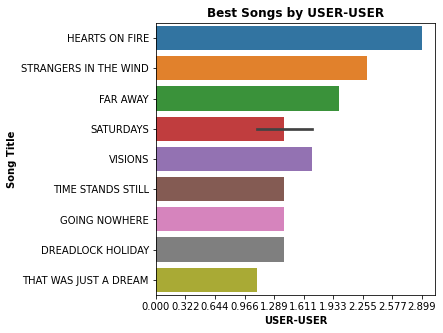

RMSE for 10 recommendation :- 0.8008263183187928
MSE for 10 recommendation :- 0.6413227921120325
Recommendation to the user 7fc8755d764ea5dc97c4a20176e63305cba0ac06


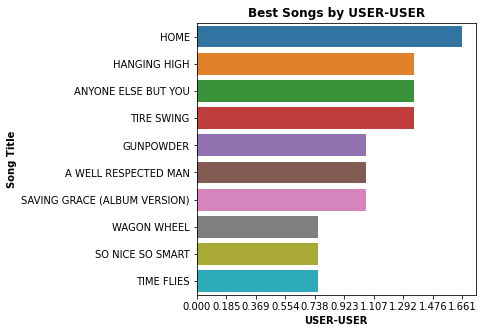

RMSE for 10 recommendation :- 1.6487411202726392
MSE for 10 recommendation :- 2.7183472816778775
Recommendation to the user b42ff0b3786ace1cb9c8608e2d42e4720e015949


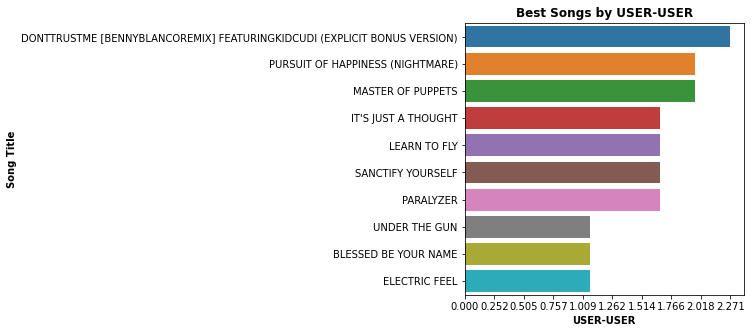

RMSE for 10 recommendation :- 1.2711673340981582
MSE for 10 recommendation :- 1.6158663912782187
Recommendation to the user ea5ce8359bb00078674794f13c20ae1cdc62c923


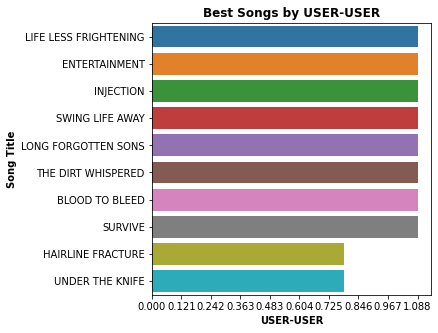

RMSE for 10 recommendation :- 1.8294035486112243
MSE for 10 recommendation :- 3.34671734367134
Recommendation to the user 22cf1221c9f24fb4d13c80c14c0643e71c7fe587


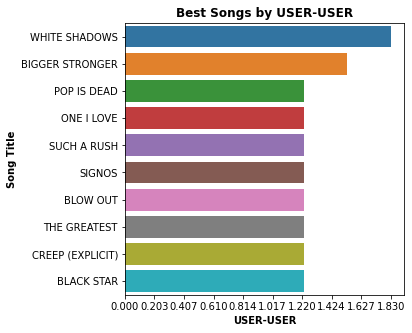

RMSE for 10 recommendation :- 0.8474473999243025
MSE for 10 recommendation :- 0.7181670956384608
Recommendation to the user 60a85d6d80cfea07e64ff556112ef845932e197b


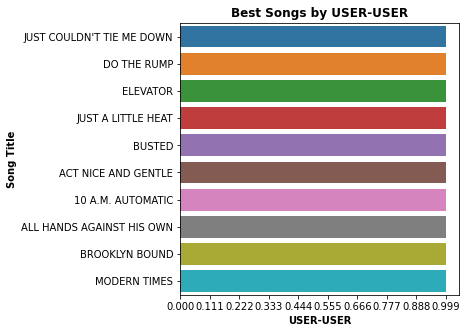

RMSE for 10 recommendation :- 1.19252680247289
MSE for 10 recommendation :- 1.4221201746162149
[0.05555555555555556, 0.11111111111111112, 0.13166666666666668, 0.14875, 0.1559722222222222, 0.16375, 0.17192460317460317, 0.2022023809523809, 0.23528880070546734, 0.2611221340388007]


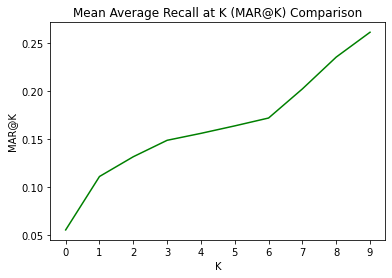

Mean Average Precision :- 0.658894
Mean Average Recall :- 0.658894
Root Mean Square Error :- 1.2634963642018522
Mean Square Error :- 1.720655003342103


In [27]:
mean_avg_precision,mean_avg_recall,rmse,mse,mark=train(pivot,test_data.iloc[:10])